## Assignment:

Choose to plot anything you wish, from the data we used so far. Please make it a good plot. Possibly choose data with more than 2 dimensions, so that you are challenging yourself to represent a third dimension graphically (e.g. time, distance, and gas consumed to travel would amount to 3 dimensions: if you had to plot them you could make a plot of distance v time, but you would have to come up with a graphical way to represent the gas usage: color, size, a third dimension...).

In [106]:
import pandas as pd
import bisect
import numpy as np

In [107]:
citibike_data = './201509-citibike-tripdata.csv'
citibike = pd.read_csv(citibike_data)

In [108]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,288,9/1/2015 00:00:00,9/1/2015 00:04:48,263,Elizabeth St & Hester St,40.717290,-73.996375,307,Canal St & Rutgers St,40.714275,-73.989900,15479,Subscriber,1989,1
1,165,9/1/2015 00:00:00,9/1/2015 00:02:45,495,W 47 St & 10 Ave,40.762699,-73.993012,449,W 52 St & 9 Ave,40.764618,-73.987895,23899,Subscriber,1987,1
2,367,9/1/2015 00:00:01,9/1/2015 00:06:08,3119,Vernon Blvd & 50 Ave,40.742327,-73.954117,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,23921,Customer,NaN,0
3,926,9/1/2015 00:00:07,9/1/2015 00:15:34,536,1 Ave & E 30 St,40.741444,-73.975361,340,Madison St & Clinton St,40.712690,-73.987763,23256,Subscriber,1992,1
4,658,9/1/2015 00:00:09,9/1/2015 00:11:07,347,Greenwich St & W Houston St,40.728846,-74.008591,483,E 12 St & 3 Ave,40.732233,-73.988900,17289,Subscriber,1976,1


In [109]:
df = citibike[['tripduration', 'starttime', 'birth year']]

In [110]:
df = df.dropna()

In [111]:
df.loc[:,'age'] =  pd.Series(2015-df.loc[:,'birth year'])
df.loc[:,'starttime'] = pd.to_datetime(df.starttime)
df.loc[:,'hour'] = df['starttime'].dt.hour
df.loc[:,'age_interval'] = [bisect.bisect([20,40,50,60,70,100], i) for i in df.age]
df.loc[:,'log_duration'] = np.log2(df.loc[:,'tripduration'])

In [120]:
df.groupby(['age_interval'])

In [113]:
df.age_interval.value_counts()

1    656058
2    221565
3    141173
4     44101
0     10742
5      5609
6       338
dtype: int64

In [114]:
df.age_interval = df.age_interval.replace({0:10,
                                           1:20,
                                           2:40,
                                           3:50,
                                           4:60,
                                           5:70,
                                           6:100})
df.head()

,tripduration,starttime,birth year,age,hour,age_interval,log_duration
0,288,2015-09-01 00:00:00,1989,26,0,20,8.169925
1,165,2015-09-01 00:00:00,1987,28,0,20,7.366322
3,926,2015-09-01 00:00:07,1992,23,0,20,9.854868
4,658,2015-09-01 00:00:09,1976,39,0,20,9.361944
5,392,2015-09-01 00:00:13,1955,60,0,60,8.614710


In [138]:
test = df.groupby(['age_interval','hour'],as_index=False)

In [139]:
agg_test = test.agg({'tripduration':np.size})
agg_test['log_tripcount'] = np.log10(agg_test['tripduration'])
agg_test.head()

,age_interval,hour,tripduration,log_tripcount
0,10,0,181,2.257679
1,10,1,104,2.017033
2,10,2,89,1.949390
3,10,3,42,1.623249
4,10,4,20,1.301030


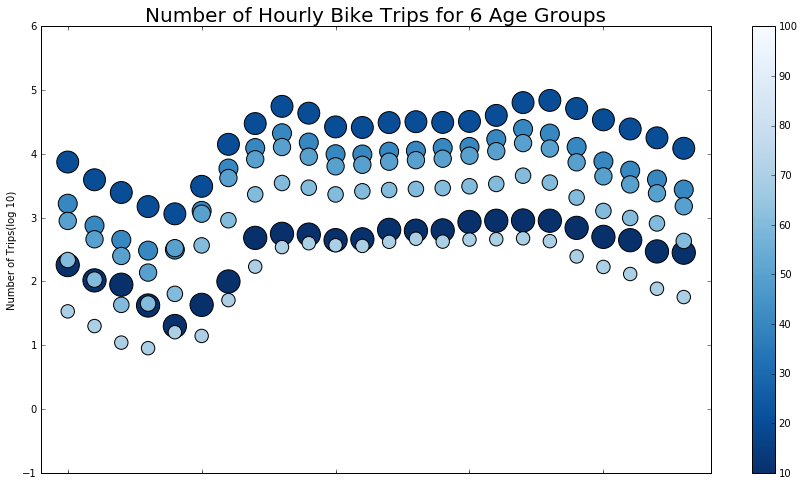

In [181]:
z = ((100-agg_test.age_interval)*5)*1.2
color= agg_test.age_interval
agg_test.plot(kind = 'scatter', x='hour', y='log_tripcount',c=color, s=z, figsize=(15,8), cmap='Blues_r')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips(log 10)')

plt.title('Number of Hourly Bike Trips for 6 Age Groups',fontsize=20)
plt.xlim(-1,24)
plt.savefig('yz3079_trip_agegroup.png')